In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import missingno as msno

In [7]:
Google_Search=pd.read_csv("google_search_data.csv")
Product_Manufacturer=pd.read_csv("product_manufacturer_list.csv")
Sales=pd.read_csv("sales_data.csv")
Social_Media=pd.read_excel("social_media_data.xlsx")
Theme=pd.read_csv("Theme_list.csv")
Theme_product_list=pd.read_csv("Theme_product_list.csv")

In [8]:
Google_Search.isnull().sum()
Sales.isnull().sum()
Social_Media.isnull().sum()

Theme Id          218511
published_date         0
total_post             0
dtype: int64

## PREPROCESSING

In [3]:
Google_Search.rename(columns = {'Claim_ID':'CLAIM_ID'}, inplace = True)
Google_Search['date']=pd.to_datetime(Google_Search['date'])
Google_Search.head()

,date,platform,searchVolume,CLAIM_ID,week_number,year_new
0,2014-05-01,google,349,916,1,2014
1,2014-06-01,google,349,916,2,2014
2,2014-07-01,google,697,916,2,2014
3,2014-10-01,google,349,916,2,2014
4,2014-01-20,google,697,916,4,2014


In [4]:
Product_Manufacturer=Product_Manufacturer[['PRODUCT_ID','Vendor']]
Product_Manufacturer.head()

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [5]:
Sales['system_calendar_key_N'] = pd.to_datetime(Sales['system_calendar_key_N'], format='%Y%m%d')
Sales.rename(columns = {'product_id':'PRODUCT_ID'}, inplace = True)
Sales.head()

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927,934,18680
1,2016-01-09,3,10289,1592,28646
2,2016-01-09,4,357,22,440
3,2016-01-09,6,23113,2027,81088
4,2016-01-09,7,23177,3231,58164


In [6]:
Social_Media.rename(columns = {'Theme Id':'CLAIM_ID'}, inplace = True)
Social_Media['published_date']=pd.to_datetime(Social_Media['published_date'])
Social_Media.head()

,CLAIM_ID,published_date,total_post
0,148.0,2015-10-01,76
1,148.0,2015-10-10,31
2,148.0,2015-10-11,65
3,148.0,2015-10-12,88
4,148.0,2015-10-13,85


In [7]:
Theme.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [8]:
Theme_product_list.head()

,product_id,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227


## Provide the list of themes available across all data sources

In [9]:
Theme['Claim Name'].unique()

array(['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff',
       'cumin', 'high/source of protein', 'no additives/preservatives',
       'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale',
       'french bisque', 'pheasant', 'whitebait', 'gmo free',
       'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit',
       'convenience - easy-to-prepare', 'anchovy', 'pomegranate',
       'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar',
       'french', 'chicken', 'ethical - packaging', 'cherry',
       'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie',
       'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry',
       'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza',
       'american southwest style', 'salmon', 'beef hamburger', 'tilapia',
       'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods',
       'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic',
       'cream', 'berry', 'g

In [10]:
Theme['Claim Name'].nunique()

208

In [11]:
Google_Search['CLAIM_ID'].nunique()

160

In [12]:
Social_Media['CLAIM_ID'].nunique()

193

In [48]:
Google_Search.rename(columns = {'Claim_ID':'CLAIM_ID'}, inplace = True)
Sales.rename(columns = {'product_id':'PRODUCT_ID'}, inplace = True)
Social_Media.rename(columns = {'Theme Id':'CLAIM_ID'}, inplace = True)
Theme_product_list.rename(columns={'product_id':'PRODUCT_ID'},inplace=True)

In [49]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales_df1=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')

In [50]:
sales_df1['CLAIM_ID'].nunique()

46

In [51]:
## UNIQUE THEMES
## TOTAL - 208
## GOOGLE SEARCH - 160
## SOCIAL MEDIA - 49

## Understands consumer preference(themes) available in each data source

<AxesSubplot:ylabel='Claim Name'>

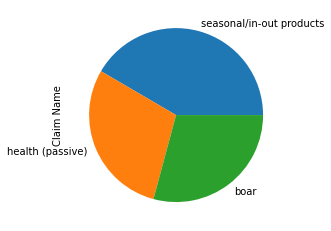

In [52]:
n = 3
df1=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
df1['Claim Name'].value_counts().head(3).plot(kind='pie')
#for i in t:
    #print(Theme[Theme['CLAIM_ID']==i])


In [53]:
###Most preferred 3 themes in Google Search data
#seasonal/in-out products , health (passive) , boar

<AxesSubplot:ylabel='Claim Name'>

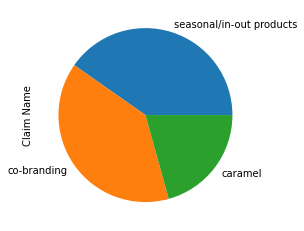

In [54]:
m = 3
df2=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
df2['Claim Name'].value_counts().head(3).plot(kind='pie')

In [55]:
#Most preferred theme in Social Media Data
#co-branding , seasonal/in-out products , kosher

<AxesSubplot:ylabel='Claim Name'>

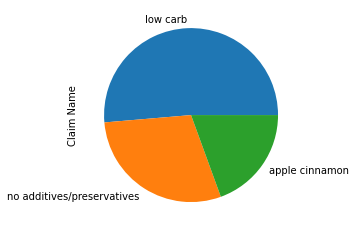

In [56]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales_df1=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')
sales_df1=sales_df1[sales_df1['CLAIM_ID']!=0]
m = 4
sales_df1['Claim Name'].value_counts().head(3).plot(kind='pie')

In [57]:
#Most preferred theme Sales Data
#low carb , no additives/preservatives, apple cinnamon

## Report for the sources

In [58]:
## Missing Values

No handles with labels found to put in legend.


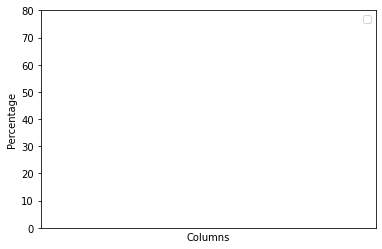

In [59]:
Sales=Sales.replace(0,np.nan)
per_1 = Sales.isna().mean().round(4) * 100
f, ax = plt.subplots()

for i,item in enumerate(zip(per_1.keys(),per_1.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.25, item[1] + 1.5 , str(item[1]))

ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend()
plt.show()

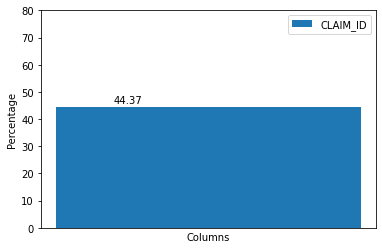

In [60]:
per_1 = Social_Media.isna().mean().round(4) * 100
f, ax = plt.subplots()

for i,item in enumerate(zip(per_1.keys(),per_1.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.25, item[1] + 1.5 , str(item[1]))

ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend()
plt.show()

<AxesSubplot:>

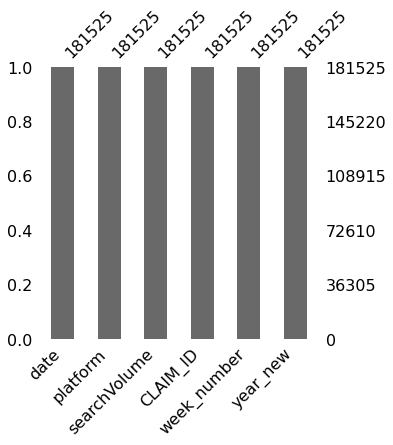

In [61]:
msno.bar(Google_Search,figsize=(5, 5))

In [62]:
#Sparcity

In [63]:
Sales=Sales.replace(np.nan,0)
Social_Media['CLAIM_ID']=Social_Media['CLAIM_ID'].replace(np.nan,0)

In [64]:
sparsity_social_media = sum((Social_Media == 0).astype(int).sum())/Social_Media.size
sparsity_sales = sum((Sales == 0).astype(int).sum())/Sales.size
sparsity_google_search = sum((Google_Search == 0).astype(int).sum())/Google_Search.size
sparsity_theme_list = sum((Theme_product_list == 0).astype(int).sum())/Theme_product_list.size
sparsity_prod_list = sum((Product_Manufacturer == 0).astype(int).sum())/Product_Manufacturer.size
sparsity_thems = sum((Theme == 0).astype(int).sum())/Theme.size
print("sparsity of social_media",sparsity_social_media)
print("sparsity of sales",sparsity_sales)
print("sparsity of Google search",sparsity_google_search)
print("sparsity of Theme product list",sparsity_theme_list)
print("sparsity of Product Manufacturer",sparsity_prod_list)
print("sparsity of Theme",sparsity_thems)
Social_Media['CLAIM_ID']=Social_Media['CLAIM_ID'].replace(0,np.nan)

sparsity of social_media 0.14790275155457364
sparsity of sales 0.0
sparsity of Google search 0.0
sparsity of Theme product list 0.1593266655735913
sparsity of Product Manufacturer 0.0
sparsity of Theme 0.002403846153846154


In [65]:
(Sales['sales_dollars_value'] == 0).sum()

0

In [66]:
(Sales['sales_lbs_value'] == 0).sum()

0

In [67]:
(Social_Media['total_post'] == 0).sum()

0

In [68]:
## The above columns has zero values. It's less percentange in the total rows in Sales data. So we can drop that rows
## sales_dollars_value --> 17662
## sales_lbs_value --> 53720
## total_post --> 87364

In [69]:
Sales.drop(Sales.index[Sales['sales_dollars_value'] == 0], inplace = True)
Sales.drop(Sales.index[Sales['sales_lbs_value'] == 0], inplace = True)
Social_Media.drop(Social_Media.index[Social_Media['total_post'] == 0], inplace = True)
print((Sales['sales_dollars_value'] == 0).sum())
print((Sales['sales_lbs_value'] == 0).sum())
print((Social_Media['total_post'] == 0).sum())

0
0
0


In [70]:
##Duplicates

In [71]:
social_media_un=Social_Media[Social_Media.duplicated()]
sales_un=Sales[Sales.duplicated()]
google_search_un=Google_Search[Google_Search.duplicated()]
theme_list_un=Theme_product_list[Theme_product_list.duplicated()]
prod_list_un=Product_Manufacturer[Product_Manufacturer.duplicated()]
thems_un=Theme[Theme.duplicated()]

In [72]:
print("Duplicated rows in Social media:",social_media_un.shape[0])
print("Duplicated rows in Sales:",sales_un.shape[0])
print("Duplicated rows in Google Search:",google_search_un.shape[0])
print("Duplicated rows in Theme Product list:",theme_list_un.shape[0])
print("Duplicated rows in Product Manufactuer:",prod_list_un.shape[0])
print("Duplicated rows in Theme:",thems_un.shape[0])

Duplicated rows in Social media: 0
Duplicated rows in Sales: 0
Duplicated rows in Google Search: 0
Duplicated rows in Theme Product list: 0
Duplicated rows in Product Manufactuer: 0
Duplicated rows in Theme: 0


In [73]:
Social_Media.drop_duplicates(inplace=True)
Sales.drop_duplicates(inplace=True)
Google_Search.drop_duplicates(inplace=True)
Theme_product_list.drop_duplicates(inplace=True)
Product_Manufacturer.drop_duplicates(inplace=True)
Theme.drop_duplicates(inplace=True)

In [74]:
social_media_un=Social_Media[Social_Media.duplicated()]
sales_un=Sales[Sales.duplicated()]
google_search_un=Google_Search[Google_Search.duplicated()]
theme_list_un=Theme_product_list[Theme_product_list.duplicated()]
prod_list_un=Product_Manufacturer[Product_Manufacturer.duplicated()]
thems_un=Theme[Theme.duplicated()]
print("Duplicated rows in Social media:",social_media_un.shape[0])
print("Duplicated rows in Sales:",sales_un.shape[0])
print("Duplicated rows in Google Search:",google_search_un.shape[0])
print("Duplicated rows in Theme Product list:",theme_list_un.shape[0])
print("Duplicated rows in Product Manufactuer:",prod_list_un.shape[0])
print("Duplicated rows in Theme:",thems_un.shape[0])

Duplicated rows in Social media: 0
Duplicated rows in Sales: 0
Duplicated rows in Google Search: 0
Duplicated rows in Theme Product list: 0
Duplicated rows in Product Manufactuer: 0
Duplicated rows in Theme: 0


## overall market share of our client

Vendor
A                7.793645e+09
B                3.825613e+09
D                2.964613e+09
E                4.619478e+08
F                1.304250e+09
G                4.696447e+08
H                6.568611e+08
Others           4.040699e+09
Private Label    2.150335e+09
Name: sales_dollars_value, dtype: float64

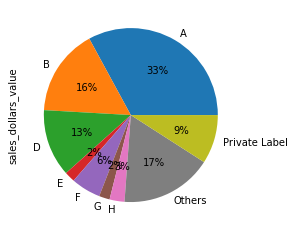

In [75]:
manu_Sales=pd.merge(Sales,Product_Manufacturer, on='PRODUCT_ID', how='inner')
manu_Sales.groupby('Vendor')['sales_dollars_value'].sum().plot(kind='pie',autopct='%.0f%%')
manu_Sales.groupby('Vendor')['sales_dollars_value'].sum()

In [76]:
## OVERALL MARKET SHARE OF OUR CLIENT A is 32 %

## potential competitors for our client in each theme

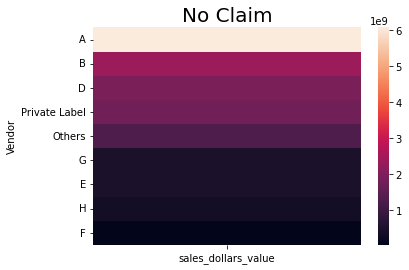

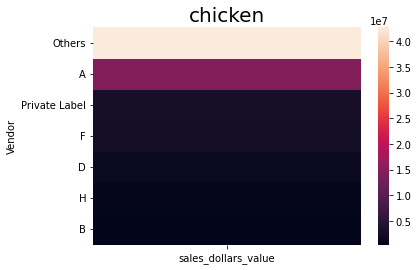

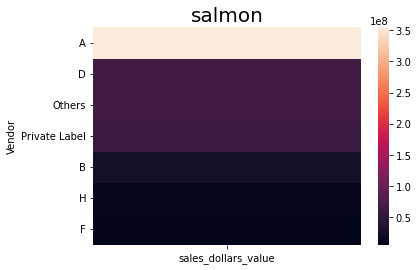

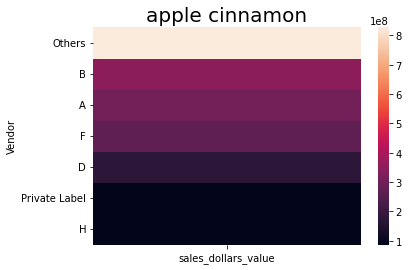

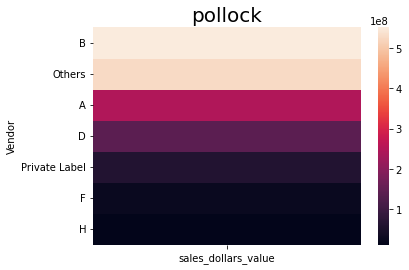

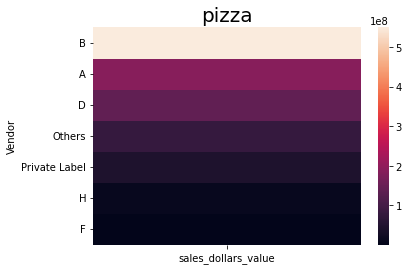

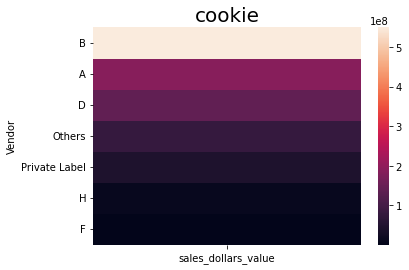

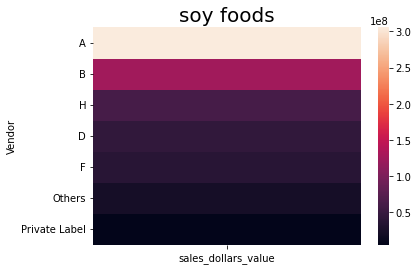

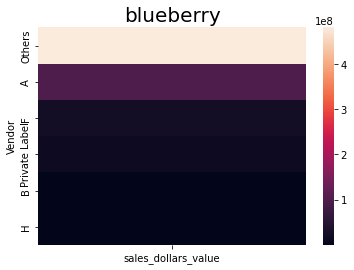

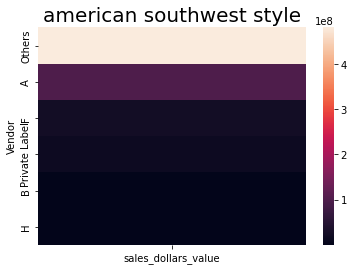

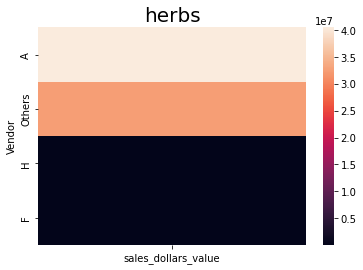

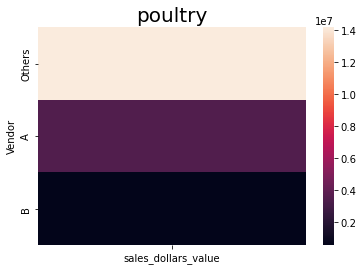

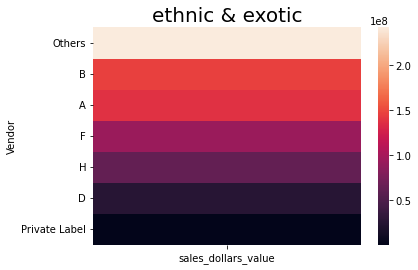

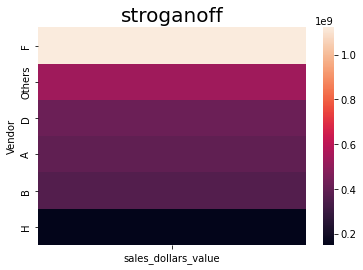

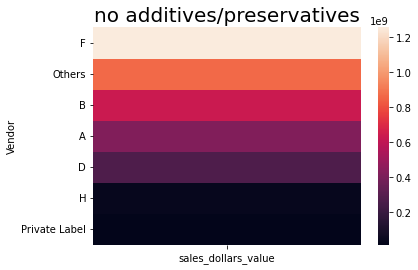

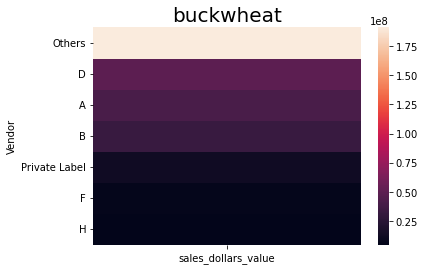

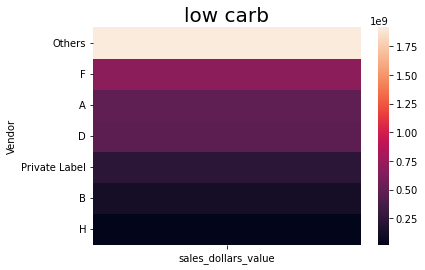

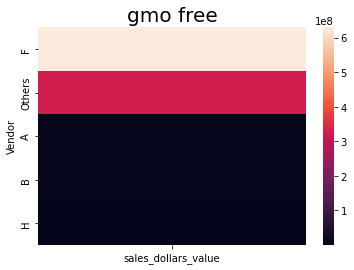

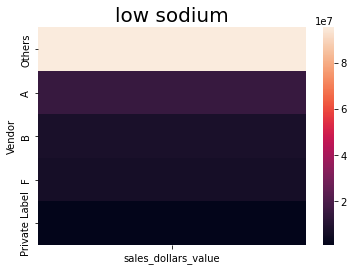

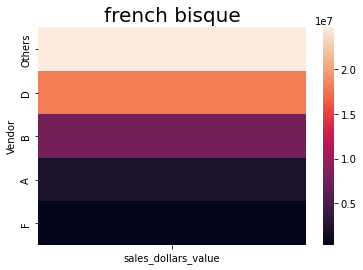

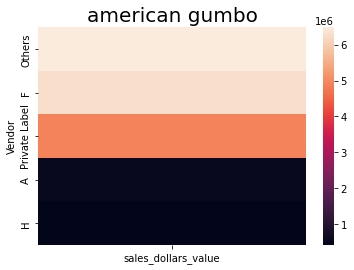

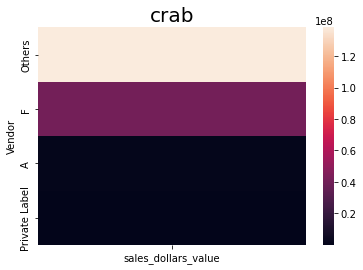

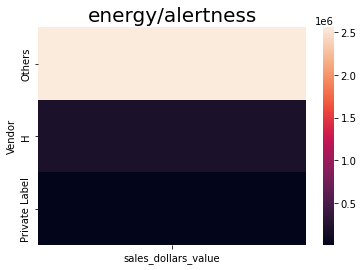

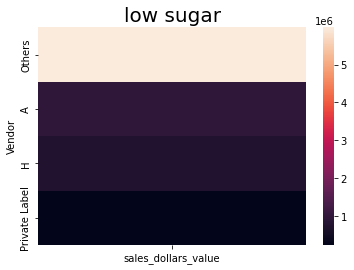

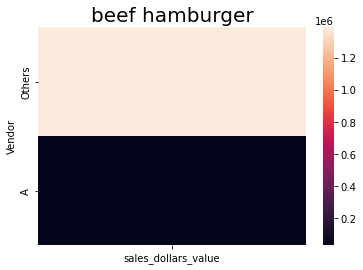

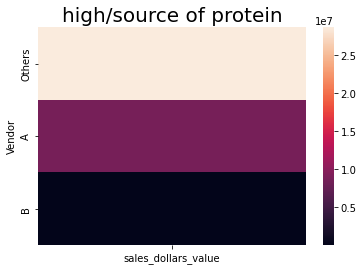

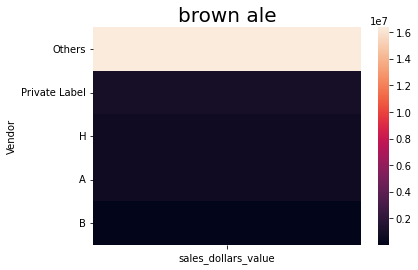

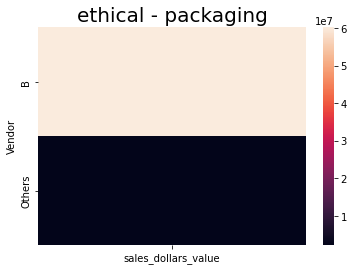

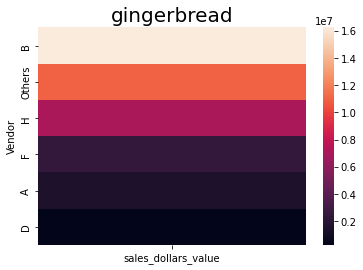

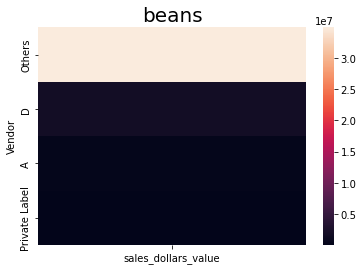

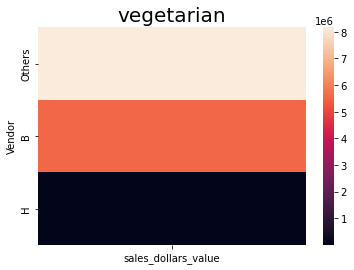

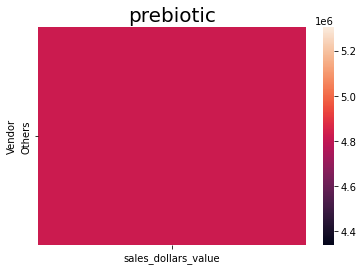

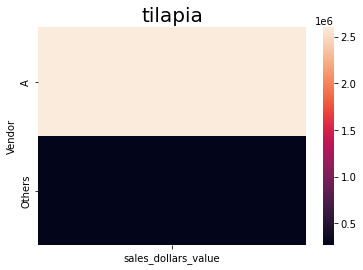

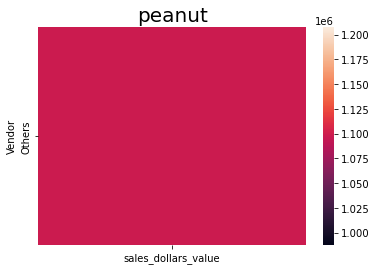

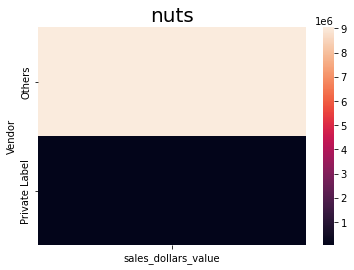

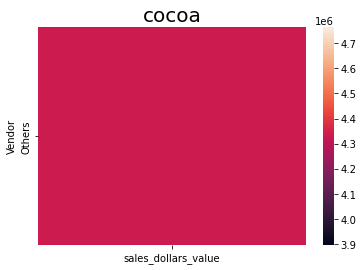

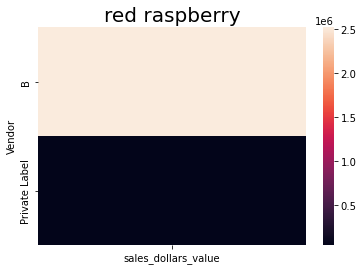

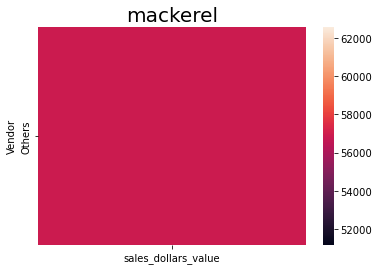

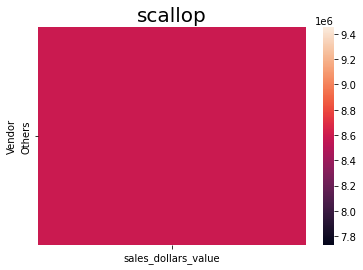

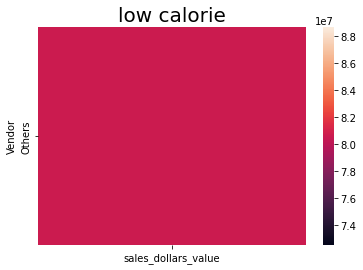

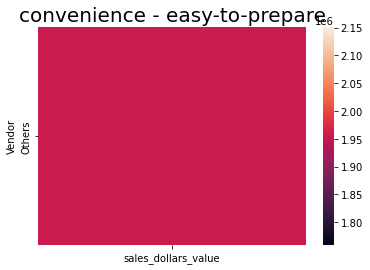

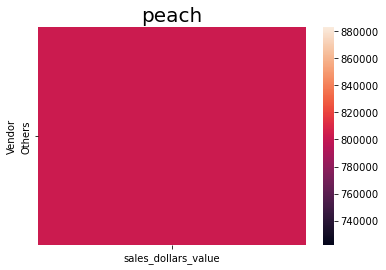

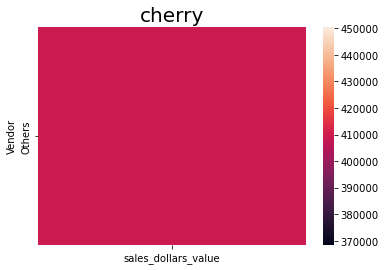

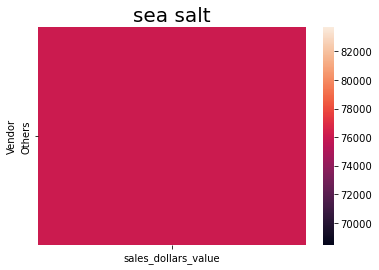

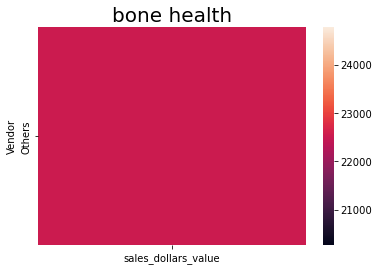

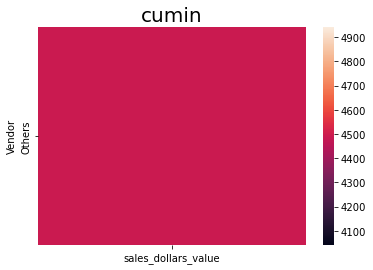

In [78]:
df1= pd.merge(Theme_product_list,Theme,on='CLAIM_ID',how='left')
df2 =pd.merge(manu_Sales,df1,on='PRODUCT_ID',how='left')
l1 = df2['Claim Name'].unique()
temp = list()
for th in l1:
    temp.append(df2[df2['Claim Name'] == th].groupby('Vendor')[['Claim Name','sales_dollars_value']].sum())
    
for i in range(0,len(temp)) :
    ax = plt.subplot()
    ax = sns.heatmap(temp[i].sort_values('sales_dollars_value', ascending = False))
    ax.set_title(l1[i],fontsize = 20)
    plt.show()

In [79]:
social=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
l_themes = social['Claim Name'].unique()
dict = {}

for th in l_themes:
    s1 = social[(social['published_date'].dt.year == 2019) & (social['Claim Name'] == th)]['total_post'].sum()
    s2 = social[(social['published_date'].dt.year == 2018) & (social['Claim Name'] == th)]['total_post'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_social = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(10) , columns=['%Growth'])
emerging_social = emerging_social.reset_index().rename(columns={'index' : 'Theme Name'})
emerging_social

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/3791866682.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,peanut butter,4166.000000
1,venison,310.000000
2,butternut squash,300.000000
3,cranberry,235.211268
4,peanut,191.056911
5,single shot,87.240356
6,pepper,72.727273
7,dill,67.132867
8,red raspberry,60.707269
9,microwaveable,50.962196


In [80]:
##PEANUT BUTTER is the highly emerging theme in Social Media data

In [81]:
google=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
l_themes = google['Claim Name'].unique()
l_themes
dict = {}

for th in l_themes :
    s1 = google[(google['date'].dt.year == 2019) & (google['Claim Name'] == th)]['searchVolume'].sum()
    s2 = google[(google['date'].dt.year == 2018) & (google['Claim Name'] == th)]['searchVolume'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_google = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(15) , columns=['%Growth'])
emerging_google = emerging_google.reset_index().rename(columns={'index' : 'Theme Name'}).tail(10).reset_index().drop(columns = ['index'])
emerging_google


C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/3151736438.py:9: RuntimeWarning: divide by zero encountered in longlong_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,convenience - ready prepared,3000.000000
1,poultry,712.495057
2,fruit,550.000000
3,peanut butter,279.657795
4,coconut,279.098361
5,oral health,195.191298
6,natural,113.461582
7,carob,100.000000
8,seeds,98.214286
9,parsley,91.498741


In [82]:
## convenience - ready prepared is the highly emerging theme in Social Media data

In [83]:
Sales_df=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
sales=pd.merge(Sales_df,Theme,on='CLAIM_ID',how='left')
l_themes = sales['Claim Name'].unique()
dict = {}

for th in l_themes :
    s1 = sales[(sales['system_calendar_key_N'].dt.year == 2019) & (sales['Claim Name'] == th)]['sales_dollars_value'].sum()
    s2 = sales[(sales['system_calendar_key_N'].dt.year == 2018) & (sales['Claim Name'] == th)]['sales_dollars_value'].sum()
    dict[th] = ((s1-s2)/s2)*100
dict
emerging_sales = pd.DataFrame(pd.Series(dict).sort_values(ascending = False).head(11) , columns=['%Growth'])
emerging_sales = emerging_sales.reset_index().rename(columns={'index' : 'Theme Name'})
emerging_sales

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/1705668251.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dict[th] = ((s1-s2)/s2)*100


,Theme Name,%Growth
0,No Claim,NaN
1,chicken,NaN
2,salmon,NaN
3,apple cinnamon,NaN
4,pollock,NaN
5,pizza,NaN
6,cookie,NaN
7,soy foods,NaN
8,blueberry,NaN
9,american southwest style,NaN


In [ ]:
## HALAL is the highly emerging theme in Social Media data

## Validate the hypothesis

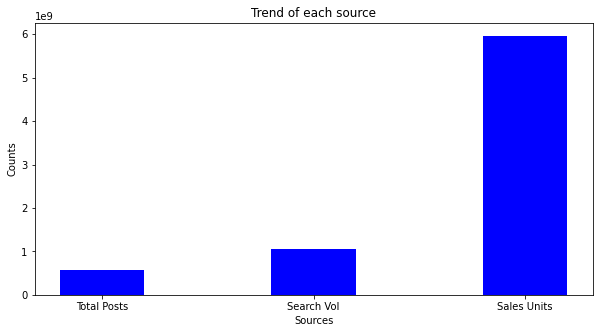

In [84]:
S=Social_Media['total_post'].sum()
G=Google_Search['searchVolume'].sum()
s=Sales['sales_units_value'].sum()
data = {'Total Posts':S ,'Search Vol':G ,'Sales Units':s}
Sources = list(data.keys())
Counts = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Sources, Counts, color ='blue',
        width = 0.4)
 
plt.xlabel("Sources")
plt.ylabel("Counts")
plt.title("Trend of each source")
plt.show()

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/2530758921.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


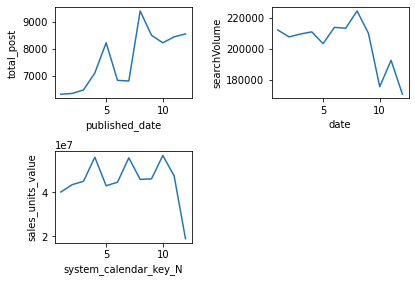

In [85]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 8][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 8][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 8][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/2264760398.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


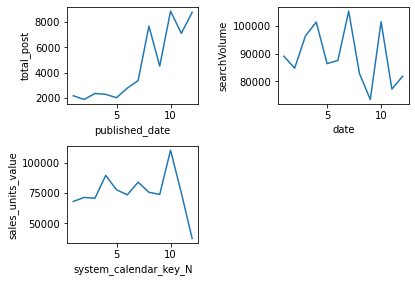

In [86]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 437][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 437][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 437][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/2261630675.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


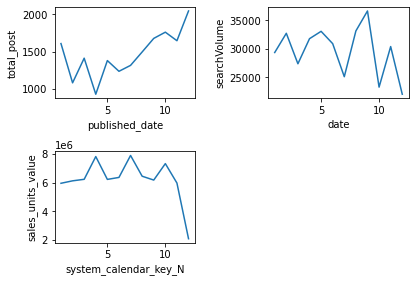

In [87]:
t1 = Social_Media.sort_values(by = ['published_date', 'CLAIM_ID'])
temp1 = pd.DataFrame(t1.groupby(['published_date', 'CLAIM_ID'])['total_post'].sum()).reset_index()
t2 = Google_Search.sort_values(by = ['date', 'CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['date', 'CLAIM_ID'])['searchVolume'].sum()).reset_index()
t3=sales_df1.sort_values(by=['system_calendar_key_N','CLAIM_ID'])
temp3 = pd.DataFrame(t3.groupby(['system_calendar_key_N', 'CLAIM_ID'])['sales_units_value'].sum()).reset_index()

plt.subplot(2, 2, 1) 
temp1 = temp1[temp1['CLAIM_ID'] == 81][['published_date', 'total_post']]
sns.lineplot(x = 'published_date', y = 'total_post' ,data = temp1[(temp1['published_date'].dt.year == 2016)].groupby(temp1['published_date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 2)
temp2 = temp2[temp2['CLAIM_ID'] == 81][['date', 'searchVolume']]
sns.lineplot(x = 'date', y = 'searchVolume' ,data = temp2[(temp2['date'].dt.year == 2016)].groupby(temp2['date'].dt.month).sum().reset_index())
plt.subplot(2, 2, 3)
temp3 = temp3[temp3['CLAIM_ID'] == 81][['system_calendar_key_N', 'sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y = 'sales_units_value' ,data = temp3[(temp3['system_calendar_key_N'].dt.year == 2016)].groupby(temp3['system_calendar_key_N'].dt.month).sum().reset_index())
plt.tight_layout(1)
plt.show()

In [88]:
#By the visualization we can clearly tell that the latency is significantly different across the themes and we can recommend the montly analysis

## SALES  MODEL

In [89]:
df1=pd.merge(Sales,Theme_product_list,on='PRODUCT_ID',how='left')
df2=pd.DataFrame(df1.groupby(['CLAIM_ID'],as_index=False)['sales_dollars_value','sales_units_value','sales_lbs_value'].sum())
df3=pd.DataFrame(Social_Media.groupby('CLAIM_ID')['total_post'].sum())
df4=pd.DataFrame(Google_Search.groupby('CLAIM_ID')['searchVolume'].sum())
df5=pd.merge(df2,df3,on='CLAIM_ID',how='left')
df6=pd.merge(df5,df4,on='CLAIM_ID',how='left')
df6['total_post'].fillna(int(df6['total_post'].mean()), inplace=True)
df6['searchVolume'].fillna(int(df6['searchVolume'].mean()), inplace=True)
df6

C:\Users\PRIYAN~1.SRI\AppData\Local\Temp/ipykernel_14004/1916538206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=pd.DataFrame(df1.groupby(['CLAIM_ID'],as_index=False)['sales_dollars_value','sales_units_value','sales_lbs_value'].sum())


,CLAIM_ID,sales_dollars_value,sales_units_value,sales_lbs_value,total_post,searchVolume
0,0,1.471754e+10,4907825522,1.515872e+10,131889.0,4327912.0
1,8,3.940624e+09,544027656,1.377938e+09,535903.0,14911004.0
2,15,3.709634e+07,2167227,7.958799e+06,10259.0,4327912.0
3,16,4.329706e+06,1810789,6.762500e+05,131889.0,4327912.0
4,32,2.974895e+09,304508975,1.294725e+09,131889.0,4327912.0
5,38,4.491000e+03,272,2.050000e+02,6514.0,4327912.0
6,39,3.742681e+07,2232248,1.752976e+07,7122.0,112339.0
7,40,3.479282e+09,352244524,1.427519e+09,28035.0,2734.0
8,58,3.355845e+08,70204378,9.034610e+07,131889.0,4327912.0
9,73,1.868764e+07,3908412,6.206997e+06,131889.0,4327912.0


In [90]:
df6['sales_lbs_value'] = df6['sales_lbs_value'].astype(np.int64)

## MODEL SELECTION

In [91]:
dataset=df6[['CLAIM_ID','total_post','searchVolume','sales_units_value','sales_lbs_value','sales_dollars_value']]

In [92]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [94]:
## Multiple Linear Regression

In [95]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [96]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.25e+09 1.01e+09]
 [1.34e+08 6.24e+07]
 [6.06e+08 2.25e+04]
 [1.82e+09 2.97e+09]
 [2.88e+08 5.28e+07]
 [8.70e+07 2.76e+06]
 [6.70e+07 4.82e+06]
 [6.95e+08 9.66e+08]
 [1.57e+08 7.91e+06]
 [1.43e+08 7.30e+07]]


In [97]:
r2_score(y_test, y_pred)

0.7616810907839852

In [98]:
## POLYNOMIAL REGRESSION

In [99]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [100]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-9.54e+09  1.01e+09]
 [ 1.56e+07  6.24e+07]
 [ 2.32e+07  2.25e+04]
 [ 8.75e+11  2.97e+09]
 [ 4.99e+08  5.28e+07]
 [ 2.27e+07  2.76e+06]
 [ 2.35e+07  4.82e+06]
 [ 2.70e+10  9.66e+08]
 [ 1.16e+07  7.91e+06]
 [-3.47e+07  7.30e+07]]


In [101]:
r2_score(y_test, y_pred)

-93334.85503567547

In [102]:
## Decision Tree Regression

In [103]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [104]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.01e+09 1.01e+09]
 [8.06e+07 6.24e+07]
 [4.49e+03 2.25e+04]
 [3.48e+09 2.97e+09]
 [1.86e+07 5.28e+07]
 [8.59e+06 2.76e+06]
 [8.59e+06 4.82e+06]
 [5.84e+08 9.66e+08]
 [2.57e+06 7.91e+06]
 [1.80e+08 7.30e+07]]


In [105]:
r2_score(y_test, y_pred)

0.9493437508492738

In [106]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [107]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.99e+09 1.01e+09]
 [5.63e+07 6.24e+07]
 [1.45e+06 2.25e+04]
 [2.90e+09 2.97e+09]
 [3.35e+07 5.28e+07]
 [4.63e+06 2.76e+06]
 [3.89e+06 4.82e+06]
 [6.78e+08 9.66e+08]
 [9.06e+06 7.91e+06]
 [1.42e+08 7.30e+07]]


In [108]:
r2_score(y_test, y_pred)

0.8693269737133333

In [109]:
##Decision tree regression tree is giving the great R2 value

## TRAINING OF MODEL

In [110]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [111]:
regressor.predict([[8,535903,14911004,2627421936,6498709428]])

array([3.94e+09])

## identify the themes with high business opportunity

<AxesSubplot:xlabel='Claim Name'>

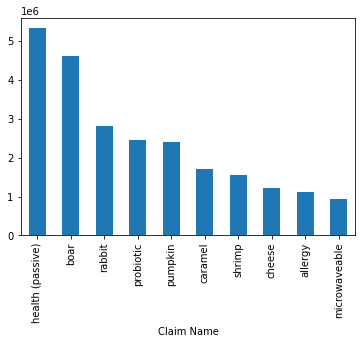

In [112]:
Soc=pd.merge(Social_Media,Theme,on='CLAIM_ID',how='left')
b1=Soc.groupby('Claim Name')['total_post'].sum().sort_values(ascending=False).head(10)
b1.plot(kind='bar')

<AxesSubplot:xlabel='Claim Name'>

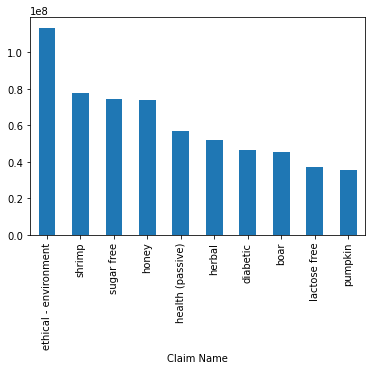

In [113]:
Goog=pd.merge(Google_Search,Theme,on='CLAIM_ID',how='left')
b2=Goog.groupby('Claim Name')['searchVolume'].sum().sort_values(ascending=False).head(10)
b2.plot(kind='bar')

In [114]:
##  health passive,pumpkin

## controllable factors which client could leverage to increase sales across themes?

In [115]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.07, 0.12, 0.08, 0.63, 1.08])

In [116]:
mutual_info=pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

4    1.082599
3    0.628332
1    0.117141
2    0.080823
0    0.071937
dtype: float64

<AxesSubplot:>

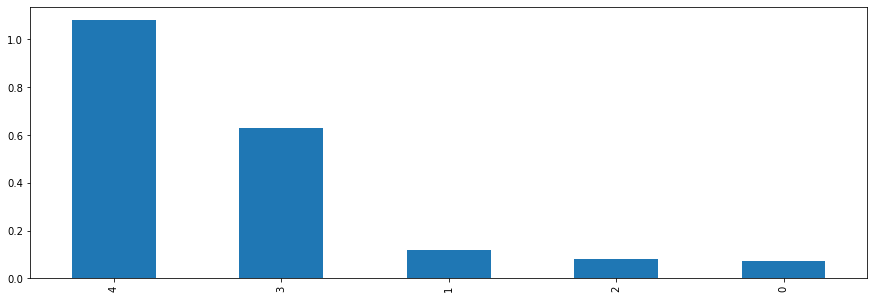

In [117]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [118]:
## sales lbs value, total post are the controllable factors and can increase 5% of sales